In [ ]:
import numpy as np
import math
import cv2
import sys
import scipy.io as sio
import matplotlib.pyplot as plt
import os
import h5py

In [ ]:
def load_wiki(wiki_path, num_data = None, target_size = (224,224)):
    mat_path = wiki_path + 'wiki_with_age.mat'
    
    data = sio.loadmat(mat_path)
    wiki_data = data['wiki'][0][0]
   
    full_num_data = len(wiki_data[6][0])
    if num_data is None or num_data > full_num_data :
        num_data = full_num_data
        
    
    full_X_data = np.zeros([num_data, 224, 224, 3],dtype = "uint8")
    full_y_data = np.zeros([num_data],dtype = "uint8")
    data_count = 0
    #len(wiki_data[6][0])
    for i in range(num_data):

        face_score =wiki_data[6][0][i]
        if face_score != float("-inf"):
            full_path = wiki_path + wiki_data[2][0][i][0]
            img = cv2.imread(full_path)
            age = wiki_data[8][0][i]
            date_of_birth = wiki_data[0][0][i]  #下面的657438是出生于1800年的Matlab serial date number
            gender = wiki_data[3][0][i]
            if img is not None and gender == gender and date_of_birth > 657438 and age >= 0 and age <= 100:
                face_loc = wiki_data[5][0][i][0]
                face_loc = face_loc.astype("int32")
                roi_img = img[face_loc[1]:face_loc[3], face_loc[0]:face_loc[2]]
                face_img = cv2.resize(roi_img, target_size)
                
                full_X_data[data_count] = face_img                
                full_y_data[data_count] = gender * 100 + age #一共分为200类，0-99是女性的1-100岁，100-199是男性的1-100岁
                
                data_count += 1
    X_data = full_X_data[:data_count]
    y_data = full_y_data[:data_count]
    
    return X_data, y_data

In [ ]:
def get_wiki_data(X_data, y_data, num_training=49000, num_validation=1000, num_test=1000):
   
    X_train = X_data[:-(num_validation + num_test)]
    y_train = y_data[:-(num_validation + num_test)]
    X_val = X_data[X_train.shape[0] : -num_test]
    y_val = y_data[X_train.shape[0] : -num_test]
    X_test = X_data[-num_test:]
    y_test = y_data[-num_test:]
    """
    if X_data.shape[0] > num_training + num_validation + num_test:
        # Subsample the data
        mask = list(range(num_training + num_validation ,  num_training + num_validation + num_test))
        X_test = X_data[mask]
        y_test = y_data[mask]
        mask = list(range(num_training, num_training + num_validation))
        X_val = X_data[mask]
        y_val = y_data[mask]
        mask = list(range(num_training))
        X_train = X_data[mask]
        y_train = y_data[mask]
    """
    # Normalize the data: subtract the mean image
    """if subtract_mean:
        mean_image = np.mean(X_data, axis=0)
        X_train -= mean_image
        X_val -= mean_image
        X_test -= mean_image"""
    # Transpose so that channels come first
    X_train = X_train.transpose(0, 3, 1, 2).copy()
    X_val = X_val.transpose(0, 3, 1, 2).copy()
    X_test = X_test.transpose(0, 3, 1, 2).copy()

    # Package data into a dictionary
    return {
      'X_train': X_train, 'y_train': y_train,
      'X_val': X_val, 'y_val': y_val,
      'X_test': X_test, 'y_test': y_test,
    }
    

In [ ]:

wiki_path = ""
if sys.platform == "linux" :
    wiki_path = "/devdata/wiki/"
else:
    wiki_path = "G:\\MachineLearning\\wiki\\wiki\\"

mat_path = wiki_path + 'wiki_with_age.mat'

# Create a new file
f = None
X_data = None
y_data = None
#wiki_crop_dataset = f.create_dataset('wiki_cropface_data', dtype = "int32")
if not os.path.exists('/devdata/wiki_cropface_data.h5'):
    f = h5py.File('/devdata/wiki_cropface_data.h5', "r")
    wiki_cropface_group = f["wiki_cropface_group"]
    X_data = np.array(wiki_cropface_group["X_data"][:])
    y_data = np.array(wiki_cropface_group["y_data"][:])
else:
    #f = h5py.File('/devdata/wiki_cropface_data.h5',"w")
    X_data, y_data  = load_wiki(wiki_path, 100)
    #wiki_cropface_group = f.create_group("wiki_cropface_group")
    #wiki_cropface_group.create_dataset('X_data', dtype = "uint8", data = X_data)
    #wiki_cropface_group.create_dataset('y_data', dtype = "uint8", data = y_data)
    
print(X_data[0].shape)
print(X_data[0].dtype)
wiki_cropface_dataset = get_wiki_data(X_data, y_data, num_training=49000, num_validation=10, num_test=0)
#f.close()

"""
test_img = X_data[0]
cv2.imshow("test_img", test_img)
cv2.waitKey()
cv2.destroyAllWindows()"""


In [ ]:
"""temp = cv2.imread("C:\\Users\\Z\\Desktop\\2006361_1907-12-25_1945.gif")
print(temp.shape)
cv2.imshow(temp)
cv2.waitKey()
cv2.destroyAllWindows()"""
import numpy
x = numpy.arange(100)
print(x)
print(x[:None])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
read from wiki finished
Train data shape:  (3000, 224, 224, 3)
Train labels shape for age:  (3000,)
Train labels shape for gender:  (3000,)
Validation data shape:  (1000, 224, 224, 3)
Validation labels shape:  (1000,)
Validation labels shape:  (1000,)
Test data shape:  (0,)
Test labels shape:  (0,)
Test labels shape:  (0,)
[200.   0.   0.   0. 200.   0.   0.   0. 200.   0.   0.   0. 200.   0.
   0.   0. 200.   0.   0.   0.   0. 200.   0.   0.   0. 200.   0.   0.
   0. 200.   0.   0.   0. 200.   0.   0.   0. 200.   0.   0.   0.   0.
 200.   0.   0.   0. 200.   0.   0.   0. 200.   0.   0.   0. 200.   0.
   0.   0. 200.   0.   0.   0.   0. 200.   0.   0.   0. 200.   0.   0.
   0. 200.   0.   0.   0. 200.   0.   0.   0. 200.]
[20.     20.2375 20.475  20.7125 20.95   21.1875 21.425  21.6625 21.9
 22.1375 22.375  22.6125 22.85   23.0875 23.325  23.5625 23.8    24.0375
 24.275  24.5125 24.75   24.9875 25.2

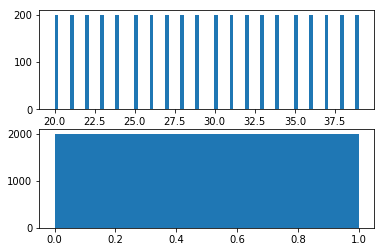

In [24]:
from load_wiki_cropface import get_wiki_crop_data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
age_gender_dict = get_wiki_crop_data(num_training=3000, num_validation=1000, num_test=0)

print('Train data shape: ', age_gender_dict["X_train"].shape)
print('Train labels shape for age: ', age_gender_dict["y_age_train"].shape)
print('Train labels shape for gender: ', age_gender_dict["y_gender_train"].shape)

print('Validation data shape: ', age_gender_dict["X_val"].shape)
print('Validation labels shape: ', age_gender_dict["y_age_val"].shape)
print('Validation labels shape: ', age_gender_dict["y_gender_val"].shape)

print('Test data shape: ', age_gender_dict["X_test"].shape)
print('Test labels shape: ', age_gender_dict["y_age_test"].shape)
print('Test labels shape: ', age_gender_dict["y_gender_test"].shape)

plt.subplot(2, 1, 1)
temp_age = np.append(age_gender_dict["y_age_train"], age_gender_dict["y_age_val"])
x, y,  z= plt.hist(temp_age, bins=80)
print(x)
print(y)
plt.subplot(2, 1, 2)
temp_gender = np.append(age_gender_dict["y_gender_train"], age_gender_dict["y_gender_val"])
plt.hist(temp_gender, bins=2)
plt.show()